# Exploratory Data Analysis: Performance of german research organizations

In [4]:
import pandas as pd
import numpy as np
import sklearn
import plotly.offline as py
from pandas.io.json import json_normalize
import ast
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

reading the data

In [8]:
nipses = []
for filename in os.listdir("../data/processed/"):
    if "nips" in filename:
        nips = pd.read_csv("../data/processed/" + filename)
        nips['year'] = filename[-8:9]
        nips['year'] = nips['year'].astype("int")
        nipses.append(nips)

In [9]:
nipses = pd.concat(nipses)

In [11]:
unis = pd.read_csv("../data/processed/german_universities.csv")
unis["type"] = "universites"

In [91]:
ins = pd.read_csv("../data/processed/german_insitutes.csv")
ins["type"] = ins["insitution"]

In [35]:
german = pd.concat([unis, ins])
german.head()

,Unnamed: 0,exploded_synonyms_index,insitution,synonyms,type,wikipedia_url
0,0,0.0,tu berlin,technical university of berlin,universites,https://en.wikipedia.org/wiki/Technical_Univer...
1,1,1.0,tu berlin,technische universität berlin,universites,https://en.wikipedia.org/wiki/Technical_Univer...
2,2,2.0,tu berlin,technical university berlin,universites,https://en.wikipedia.org/wiki/Technical_Univer...
3,3,3.0,tu berlin,tu berlin,universites,https://en.wikipedia.org/wiki/Technical_Univer...
4,4,4.0,tu berlin,berlin university of technology,universites,https://en.wikipedia.org/wiki/Technical_Univer...


## Share of authors

In [28]:
total_mentions = nipses.groupby("year")["AfN"].value_counts().reset_index(name="authors")
total_mentions["rank"] = total_mentions.groupby('year')['authors'].rank(ascending=False).astype("int")
total_mentions = total_mentions.set_index("year")
total_mentions.head()

,AfN,authors,rank
year,,,
1987,california institute of technology,24,1
1987,bell labs,9,2
1987,massachusetts institute of technology,8,3
1987,telcordia technologies,7,4
1987,university of washington,7,4


In [114]:
other_tm = total_mentions[~total_mentions["AfN"].isin(german["synonyms"])].groupby("year")["authors"].sum().reset_index()
other_tm["AfN"] = "other institutions"
other_tm = other_tm.set_index("year")

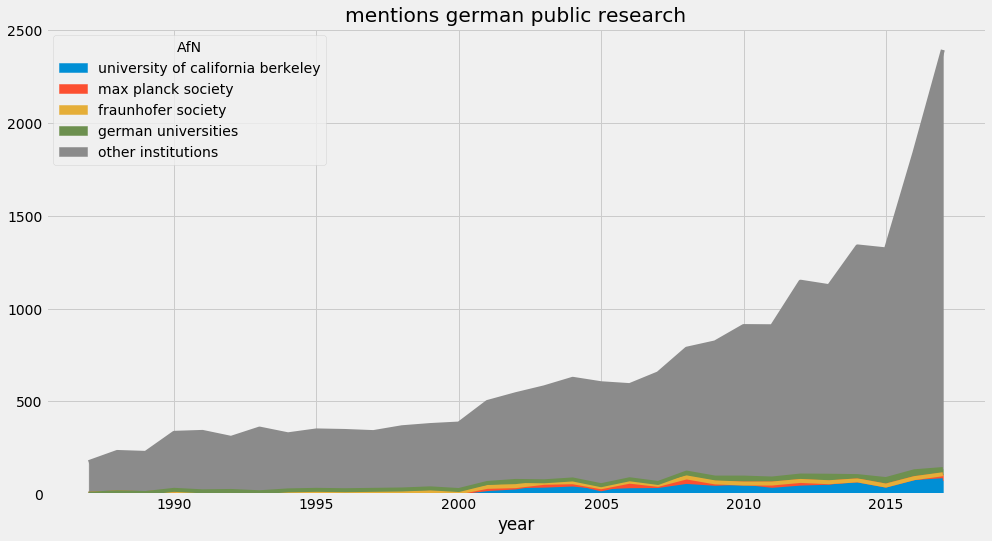

In [117]:
#top_us_unis = ["massachusetts institute of technology","carnegie mellon university","stanford university","university of california berkeley"]
top_us_unis = ["university of california berkeley"]
german_mit = german["synonyms"].append(pd.DataFrame(top_us_unis))
german_ins = total_mentions[total_mentions["AfN"].isin(ins["synonyms"])][["AfN", "authors"]]
us_unis = total_mentions[total_mentions["AfN"].isin(top_us_unis)]
german_unis = total_mentions[total_mentions["AfN"].isin(unis["synonyms"])][["AfN", "authors"]]
german_unis = german_unis.groupby("year")["authors"].sum().reset_index()
german_unis = german_unis.set_index("year")
german_unis["AfN"] = "german universities"
total = other_tm.append(us_unis).append(german_unis).append(german_ins)
#total = us_unis.append(german_unis).append(german_ins)
total = total.pivot(columns='AfN', values='authors').fillna(0)
total = total.reindex(columns=top_us_unis + (list(ins["synonyms"])) + ["german universities", "other institutions"])
total.plot.area(title="mentions german public research")

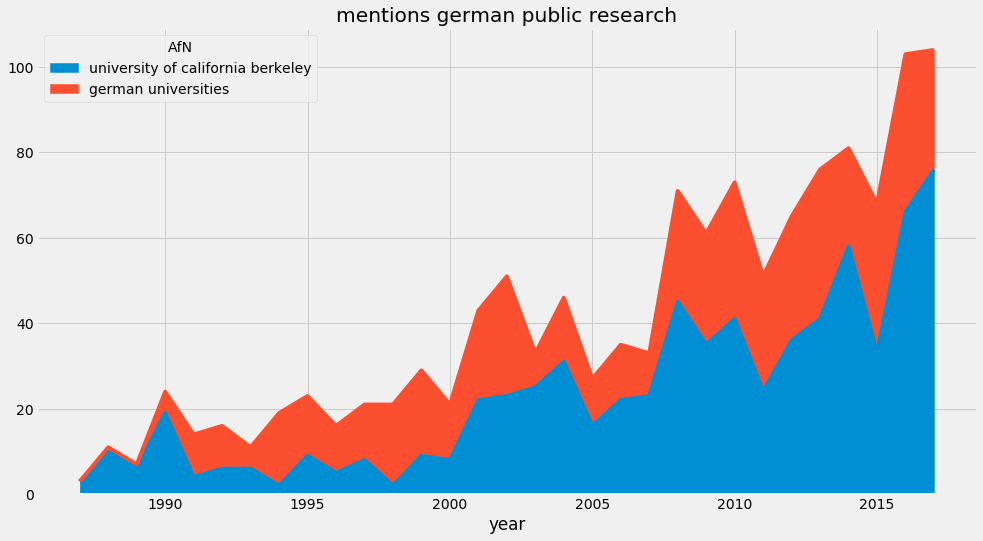

In [113]:
total_2 = total.reindex(columns=top_us_unis + ["german universities"])
total_2.plot.area(title="mentions german public research")